
Example calculation of 95% confidence intervals
Monthly mean 30yr average temperature climatology
The statistical and programming objective is:
Calculate long-term mean for the average temperatures years during the years 1951-1980 and 1989-2018: For each month: January, February, March , ... November, December
For each monthly climatological mean determine the 95% confidence interval using the equations described in the reading assignment
Summarize the results in one or two figures that allow us to observe changes in the mean climatologies.
Please refer to the textbooks for the calculations steps involved in estimating the 95% confidence interval for the population mean!
Collaborative Statistics textbook Chapter 8.3 (p337)
Practical Statistics Book Chapter 2 Box 2.2 pages 18-19.
1. Code development
1.1 Import packages and function definitions
Supporting function to send request to the server and get the data. This is a function similar to the previous version in which we downloaded GHCN daily temperature data from the ACIS server. The function returns two lists that we assign to the 'standard variables' x and y. x contains the list with dates (type datetime), y the list with temperatures (type float).
We also import here all necessary packages. For the confidence interval calculation we make use the SciPy package stats.

In [1]:
# request a station time series
# from Applied Climate Information System
# http://www.rcc-acis.org/index.html
# Author: OET
# code designed for ATM315/ENV315 Python introduction

import numpy as np
import matplotlib.pyplot as plt
import urllib3
import json
import datetime as dt
# for confidence interval calculation
from scipy import  stats


#########################################################################################################
# function to get the monthly data from the server
#########################################################################################################
def get_stationdata_monthly(sid,var='avgt',startyear=2017,endyear=2017):
    """Sends request to regional climate center ACIS and gets monthly data for one station.
    Input parameters: 
        sid (string): a station id
        var (string): a variable name (e.g. 'avgt', 'mint', 'maxt')
    Keyword parameters:
        startyear and endyear (integers): for selecting the year range e.g. 1950 and 2017
    
    Returned objects:
        list with dates (datetime objects)
        list with the data 
    """    
    # the http address of the data server
    host="http://data.rcc-acis.org/StnData"
    # forming the query string for the host server
    sdate='&sdate='+str(startyear)+'-01-1'
    edate='&edate='+str(endyear)+'-12-31'
    query='?sid='+sid+'&'+sdate+'&'+edate+'&interval=mly&'\
    +'elems='+"mly_mean_"+var
    # try to connect and to get the requested data
    # in format ready to export to a csv file
    print (">send data request to "+host+query)
    print ("station id:",sid)
    print ("year range: %4d - %4d" % (startyear,endyear))
    print ("> still waiting for response ...")
    try:
        http= urllib3.PoolManager()
        response = http.request('GET',host+query)
        # convert json-string into dictionary
        content =  json.loads(response.data.decode('utf-8'))
        meta=content['meta']
        data=content['data']
        time=[]
        value=[]
        for item in data:
            #print (item)
            time.append(dt.datetime.strptime(item[0],"%Y-%m"))
            if (item[1]!='M'):
                value.append(float(item[1]))
            else:
                value.append(np.NAN)
    except Exception as e:
        print ("error occurred:", e)
        return
    print(">... done")
    return time,value

In [2]:
station_id="USW00014735"
varname="avgt"
x,y=get_stationdata_monthly(station_id,varname,startyear=1900,endyear=2018)

>send data request to http://data.rcc-acis.org/StnData?sid=USW00014735&&sdate=1900-01-1&&edate=2018-12-31&interval=mly&elems=mly_mean_avgt
station id: USW00014735
year range: 1900 - 2018
> still waiting for response ...
>... done


1.3 Preparing the data for statistical calculations

Task 1: Convert variable x from type list into variable x with function np.array 

Do the same with variable y. Plot the time series to validate that the data are okay: x is recognized as a numpy array of 'dates' (datetime objects), and y as array with float numbers.

[datetime.datetime(1900, 1, 1, 0, 0) datetime.datetime(1900, 2, 1, 0, 0)
 datetime.datetime(1900, 3, 1, 0, 0) ...
 datetime.datetime(2018, 10, 1, 0, 0) datetime.datetime(2018, 11, 1, 0, 0)
 datetime.datetime(2018, 12, 1, 0, 0)]
[  nan   nan   nan ... 50.74 36.97 32.37]


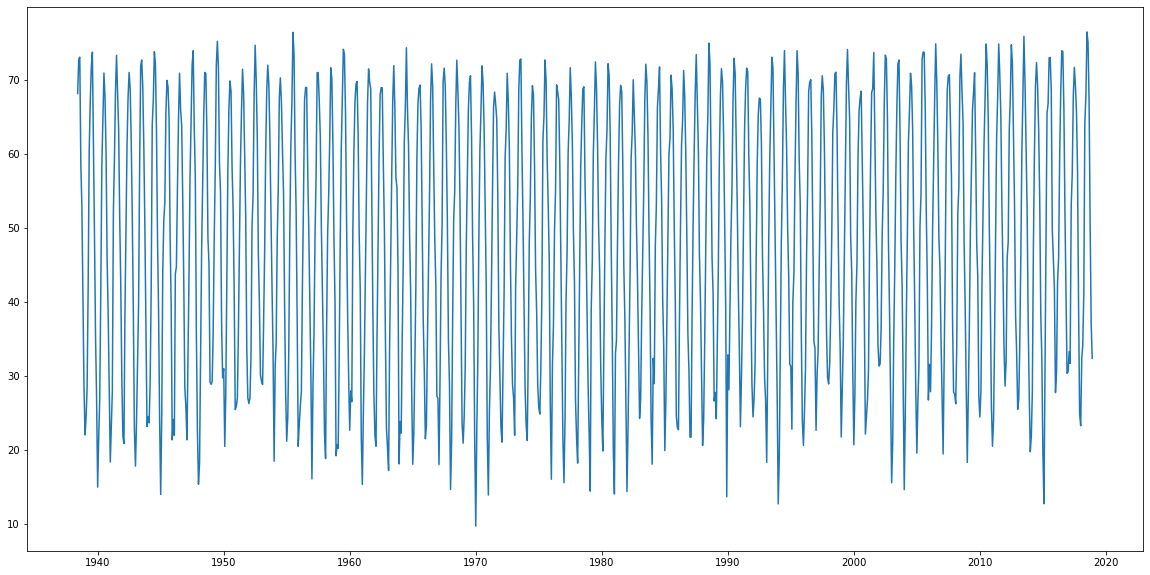

In [3]:
x1=np.array(x)
y1=np.array(y)
print(x1)
print(y1)

plt.figure(figsize=(20,10))
plt.plot(x1,y1)



Task 2: Check what is the first year and month in the data? 

In [4]:
year_month_1=x1[0]
print(year_month_1)


# working with datetime
d1=dt.datetime(2021,4,20,12,43,23,12)
d2=dt.datetime(2021,5,20,12,5,8,9)
print(d1)
print(d2)
print(d1,d2)
print(d1.month)
print(d2.second)
print(d2-d1)
print(d2<d1)
print(d1<d2)
print(d1.year)

1900-01-01 00:00:00
2021-04-20 12:43:23.000012
2021-05-20 12:05:08.000009
2021-04-20 12:43:23.000012 2021-05-20 12:05:08.000009
4
8
29 days, 23:21:44.999997
False
True
2021




Task 3: Select the data from x and y for the two 30 climate period: 1951-1980 and 1989-2018 

Assign the results to new variables and check with np.shape the dimensions and size of the data array. You should have 360 data left in the arrays.
Tip:
Apply np.logical_and function and two Boolean array operations to the array x.
For this make use of the dt.datetime function to define a reference date for comparison as shown in the code below:

In [5]:
xtest=np.array([dt.datetime(1981,7,17),dt.datetime(1990,11,30),dt.datetime(2011,12,6)])
testdate=dt.datetime(1990,12,31)
after_date=xtest>testdate
print (xtest[after_date])

# your code for 30 year subsampled data arrays

xarray=np.logical_and(x1>dt.datetime(1951,1,1),x1<dt.datetime(1980,12,31))
x2array=np.logical_and(x1>dt.datetime(1989,1,1),x1<dt.datetime(2018,12,31))
print(xarray)
print(x2array)
print(y1[xarray])
print(y1[x2array])




[datetime.datetime(2011, 12, 6, 0, 0)]
[False False False ... False False False]
[False False False ...  True  True  True]
[27.02 35.26 47.63 58.71 65.95 71.48 68.23 60.15 51.5  33.75 27.03 26.26
 27.03 32.47 50.23 54.39 68.08 74.73 69.94 62.02 46.55 39.8  30.13 29.26
 28.84 36.69 46.63 60.03 68.5  72.03 69.45 62.13 52.32 42.1  33.45 18.45
 31.34 34.37 48.43 55.27 67.63 70.32 66.98 60.42 54.77 39.68 27.85 21.16
 24.41 33.08 49.67 61.18 67.02 76.47 73.56 60.02 52.31 37.38 20.47 23.5
 26.05 27.85 42.53 53.48 67.3  68.97 69.03 57.63 49.84 39.88 30.4  16.06
 28.8  35.5  48.9  56.95 71.02 71.03 67.27 62.25 50.16 41.67 33.15 22.05
 18.82 35.94 49.08 54.39 62.05 71.68 70.18 61.45 48.87 39.92 19.19 20.71
 20.2  32.15 48.02 60.68 67.62 74.18 73.48 65.6  51.42 38.38 29.94 22.65
 27.97 26.52 49.55 60.34 67.08 69.47 69.82 62.78 49.32 41.52 21.6  15.32
 25.5  32.98 43.85 55.4  66.97 71.52 69.71 68.83 53.92 39.33 27.63 21.9
 20.48 34.66 46.95 59.79 68.05 68.98 68.98 58.73 50.15 35.   22.95 20.24
 17



Task 4: Reshape the array or find other ways to process the data now separated by months 

Tip:
We have used np.reshape in class before to get a 1-dim array into 2-dim array.
We have to remember the 'filling-rule'. Once we have the temperature data arranged by months (months will go into columns),
You can apply np.mean, np.std functions with the keyword parameter axis. See help(np.mean) for info. The axis specifies on which axis dimension you want to apply mean. For example in 2-dim array with 30 rows and 12 columns, axis=0 takes the rows as samples and returns 12 averages. See example below.
Alternatively, you can work with a loop (over month lists, the append methods, but this may involve more programming)


In [6]:
print(x1)

[datetime.datetime(1900, 1, 1, 0, 0) datetime.datetime(1900, 2, 1, 0, 0)
 datetime.datetime(1900, 3, 1, 0, 0) ...
 datetime.datetime(2018, 10, 1, 0, 0) datetime.datetime(2018, 11, 1, 0, 0)
 datetime.datetime(2018, 12, 1, 0, 0)]


In [7]:
# for-in loop small operations within the one line of code

values=[1,2,3,4]
stringlist=[]

for x in values:
    stringlist.append(str(x))
print(stringlist)

test=[str(x) for x in values]
print(test)


['1', '2', '3', '4']
['1', '2', '3', '4']


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5
 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5]
[3.45205253 3.45205253 3.45205253 3.45205253 3.45205253 3.45205253
 3.45205253 3.45205253 3.45205253 3.45205253 3.45205253 3.45205253
 3.45205253 3.45205253 3.45205253 3.45205253 3.45205253 3.45205253
 3.45205253 3.45205253 3.45205253 3.45205253 3.45205253 3.45205253
 3.45205253 3.45205253 3.45205253 3.45205253 3.45205253 3.45205253]
6.5
3.452052529534663


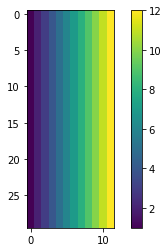

In [8]:
# example for np.mean() with keyword parameter axis
# first extract month from datetime objects and form a 30x12 data matrix
m=[d.month for d in x1[0:360]]
m=np.array(m)
m=np.reshape(m,newshape=[30,12])
# the keyword axis can control how numpy does statisitcal calculations (specify dimensions) 
print(np.mean(m,axis=0)) 
print(np.std(m,axis=0))
print(np.mean(m,axis=1))
print(np.std(m,axis=1))
print(np.mean(m))
print(np.std(m))



plt.imshow(m)
plt.colorbar()
plt.show()





Task 5: Calculate the mean and standard deviation for each month 


In [9]:
y1.shape
test=y1[600:720]
test.shape
mtest=np.reshape(test,newshape=[10,12])
print(mtest)
mtest.shape
mtemp=np.mean(mtest,axis=0) # take the ten rows as a sample and repeat the calc for each column 
print(mtemp)
msd=np.std(mtest,axis=0)
print(msd)

[[30.98 20.46 27.15 43.07 57.5  66.1  69.89 68.52 58.15 52.56 41.22 25.44]
 [25.85 27.02 35.26 47.63 58.71 65.95 71.48 68.23 60.15 51.5  33.75 27.03]
 [26.26 27.03 32.47 50.23 54.39 68.08 74.73 69.94 62.02 46.55 39.8  30.13]
 [29.26 28.84 36.69 46.63 60.03 68.5  72.03 69.45 62.13 52.32 42.1  33.45]
 [18.45 31.34 34.37 48.43 55.27 67.63 70.32 66.98 60.42 54.77 39.68 27.85]
 [21.16 24.41 33.08 49.67 61.18 67.02 76.47 73.56 60.02 52.31 37.38 20.47]
 [23.5  26.05 27.85 42.53 53.48 67.3  68.97 69.03 57.63 49.84 39.88 30.4 ]
 [16.06 28.8  35.5  48.9  56.95 71.02 71.03 67.27 62.25 50.16 41.67 33.15]
 [22.05 18.82 35.94 49.08 54.39 62.05 71.68 70.18 61.45 48.87 39.92 19.19]
 [20.71 20.2  32.15 48.02 60.68 67.62 74.18 73.48 65.6  51.42 38.38 29.94]]
[23.428 25.297 33.046 47.419 57.258 67.127 72.078 69.664 60.982 51.03
 39.378 27.705]
[4.45459942 3.99993762 3.11813791 2.5057432  2.67794996 2.16106941
 2.23372693 2.16404806 2.16189176 2.1659409  2.31371908 4.59618592]




Task 6: Finally, get the 95% confidence range using supporting function for the t-distribution from SciPy package stats 



In [10]:
# example code
n=10
df=n-1
alpha=0.95 # for both samples
tint=np.array(stats.t.interval(alpha,df)) # function itself returns a lists
ystd=np.array([6,5,4,3,2,1,1,2,3,4,5,6])
cf=np.zeros(shape=[12,2])
for i in range(12):
    cf[i,:]=tint*ystd[i]/np.sqrt(n)
    print (i,cf[i,0],cf[i,1])
    i+=1

0 -4.2921414357154335 4.2921414357154335
1 -3.5767845297628607 3.5767845297628607
2 -2.8614276238102887 2.8614276238102887
3 -2.1460707178577167 2.1460707178577167
4 -1.4307138119051444 1.4307138119051444
5 -0.7153569059525722 0.7153569059525722
6 -0.7153569059525722 0.7153569059525722
7 -1.4307138119051444 1.4307138119051444
8 -2.1460707178577167 2.1460707178577167
9 -2.8614276238102887 2.8614276238102887
10 -3.5767845297628607 3.5767845297628607
11 -4.2921414357154335 4.2921414357154335



2. Results

Task 7: Present the climatologies in a graph or two that make it easy to see the differences between the two periods, and how much the confidence intervals overlap. 

Tip: Check the function plt.errorbar

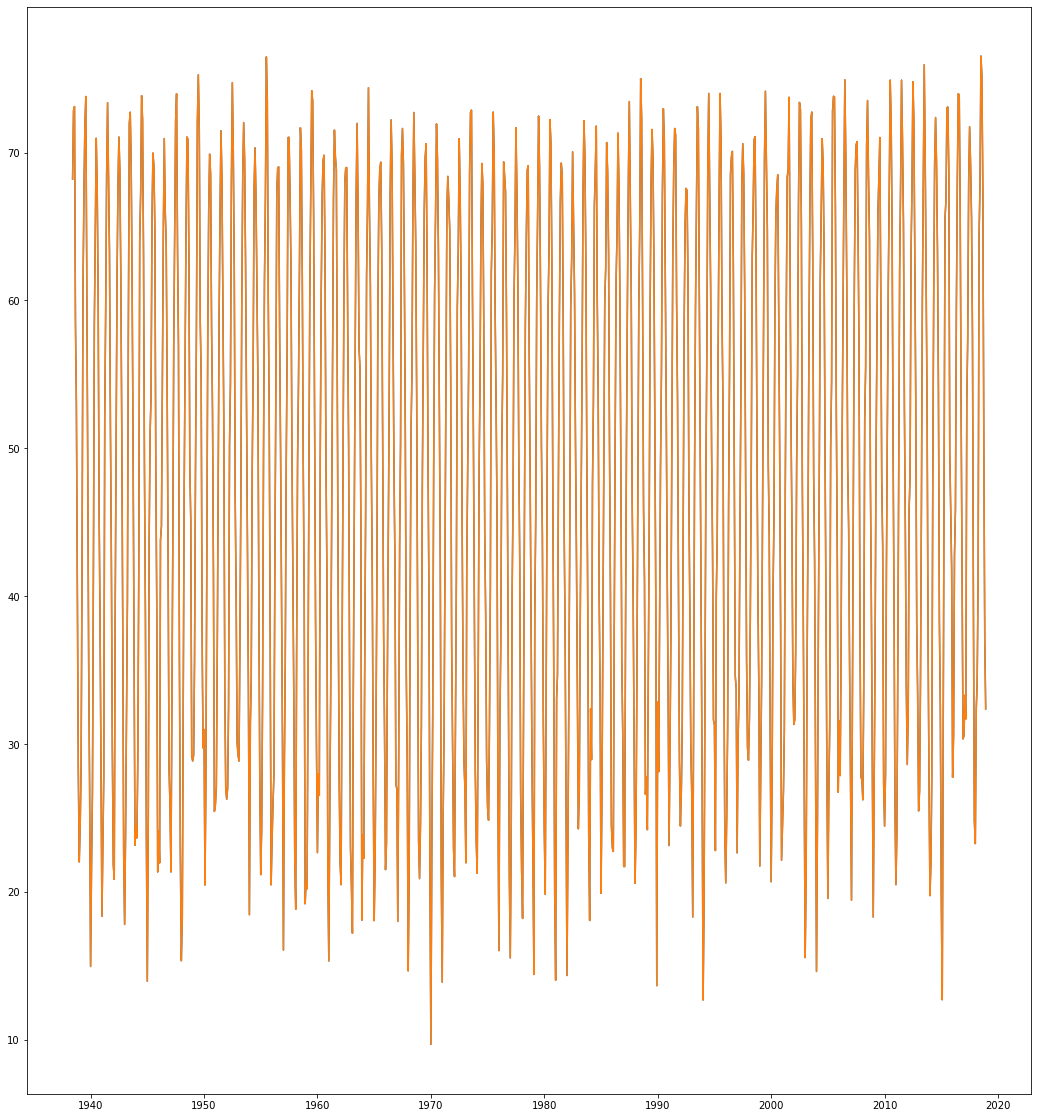

In [11]:
plt.figure(figsize=(18,20))
plt.plot(x1,y1)
plt.errorbar(x1,y1)
plt.show()



Task 8: Optional: Summary of the quantitavie results 

Write all the results in form of a data table as shown below (illustrated with some random numbers).